In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read house data

In [7]:
file_data=pd.read_csv("./housedata.csv")
file_data.head()

,区域,小区名称,户型,面积(㎡),价格(元/月)
0,东城,万国城MOMA,1室0厅,59.11平米,10000
1,东城,北官厅胡同2号院,3室0厅,56.92平米,6000
2,东城,和平里三区,1室1厅,40.57平米,6900
3,东城,菊儿胡同,2室1厅,57.09平米,8000
4,东城,交道口北二条35号院,1室1厅,42.67平米,5500


In [9]:
file_data.shape

(8223, 5)

In [11]:
file_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8223 entries, 0 to 8222
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   区域       8223 non-null   object
 1   小区名称     8223 non-null   object
 2   户型       8223 non-null   object
 3   面积(㎡)    8223 non-null   object
 4   价格(元/月)  8223 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 321.3+ KB


In [13]:
file_data.describe()

,价格(元/月)
count,8223.000000
mean,9512.297823
std,9186.752612
min,566.000000
25%,4800.000000
50%,6800.000000
75%,10000.000000
max,150000.000000


## basic deals of data

### check duplication 

In [14]:
file_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8218    False
8219    False
8220    False
8221    False
8222    False
Length: 8223, dtype: bool

In [16]:
file_data=file_data.drop_duplicates()
file_data.shape

(5773, 5)

### deal with none 

In [18]:
file_data=file_data.dropna()
file_data.shape

(5773, 5)

## transform of datatype

### transform area datatype

In [22]:
file_data["面积(㎡)"].values[0][:-2]

'59.11'

In [27]:
#create a new array
data_new=np.array([])
data_area=file_data["面积(㎡)"].values
for i in data_area:
    data_new=np.append(data_new,i[:-2])

In [24]:
data_area

array(['59.11平米', '56.92平米', '40.57平米', ..., '92.41平米', '71.81平米',
       '35.43平米'], dtype=object)

In [28]:
data_new

array(['59.11', '56.92', '40.57', ..., '92.41', '71.81', '35.43'],
      dtype='<U32')

### transform datatype of data_new

In [30]:
data_new=data_new.astype(np.float64)

In [31]:
data_new

array([59.11, 56.92, 40.57, ..., 92.41, 71.81, 35.43])

In [35]:
file_data.loc[:,"面积(㎡)"]=data_new

In [36]:
file_data.head()

,区域,小区名称,户型,面积(㎡),价格(元/月)
0,东城,万国城MOMA,1室0厅,59.11,10000
1,东城,北官厅胡同2号院,3室0厅,56.92,6000
2,东城,和平里三区,1室1厅,40.57,6900
3,东城,菊儿胡同,2室1厅,57.09,8000
4,东城,交道口北二条35号院,1室1厅,42.67,5500


### house type expression transform

In [42]:
house_data=file_data["户型"]
temp_list=[]
for i in house_data:
    new_info=i.replace("房间","室")
    temp_list.append(new_info)
#temp_list

In [46]:
file_data.loc[:,"户型"]=temp_list
#file_data

# housedata annalyse by table

## annalyse of house number and positions

In [48]:
file_data["区域"].unique().shape

(13,)

In [65]:
new_df=pd.DataFrame({"area":file_data["区域"].unique(),"number":[0]*file_data["区域"].unique().shape[0]})

## get size of each area 

In [51]:
area_count=file_data.groupby(by="区域").count()
area_count

,小区名称,户型,面积(㎡),价格(元/月)
区域,,,,
东城,282,282,282,282
丰台,577,577,577,577
亦庄开发区,147,147,147,147
大兴,362,362,362,362
房山,180,180,180,180
昌平,347,347,347,347
朝阳,1597,1597,1597,1597
海淀,605,605,605,605
石景山,175,175,175,175


In [58]:
area_count.values[:,0]

array([ 282,  577,  147,  362,  180,  347, 1597,  605,  175,  442,  477,
        285,  297])

In [69]:
new_df["number"]=area_count.values[:,0]
new_df.sort_values(by="number",ascending=True)

,area,number
2,亦庄开发区,147
8,石景山,175
4,房山,180
0,东城,282
11,门头沟,285
12,顺义,297
5,昌平,347
3,大兴,362
9,西城,442
10,通州,477


## house type annalyse

In [128]:
house_data=file_data["户型"]
house_data.head()



0    1室0厅
1    3室0厅
2    1室1厅
3    2室1厅
4    1室1厅
Name: 户型, dtype: object

In [129]:
# def all_house(arr):
#     key=np.unique(arr)
#     result={}
#     for k in arr:
#         if k not in result:
#             result[k]=1
#         else:
#             result[k]=result[k]+1
#     return result
# house_info=all_house(house_data)

# house_dic=pd.DataFrame.from_dict(house_info,orient="index",columns=["numbers"])
# house_dic=house_dic.reset_index().rename(columns={"index":"type"})
# house_dic.sort_values(by="type",ascending=True)

In [ ]:
def all_house(arr):
    key=np.unique(arr)
    result={}
    for k in key:
        mask=(arr==k)
        arr_new=arr[mask]
        v=arr_new.size
        result[k]=v
    return result


In [133]:
house_info=all_house(house_data)
# house_info

In [137]:
house_data=dict((key,value) for key,value in house_info.items() if value>50)
house_data

{'1室0厅': 244,
 '1室1厅': 844,
 '2室1厅': 2249,
 '2室2厅': 265,
 '3室1厅': 766,
 '2室1卫': 120,
 '4室1厅': 58,
 '3室2厅': 489,
 '1室1卫': 126,
 '4室2厅': 191,
 '3室1卫': 92}

In [144]:
house_analyse=pd.DataFrame({"houseType":[x for x in house_data.keys()],
                    "nums":[x for x in house_data.values()]})
house_analyse=house_analyse.sort_values(by="houseType")

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 23460 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 21381 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 21355 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 23460 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 21381 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 21355 missing from current font.
  font.set_text

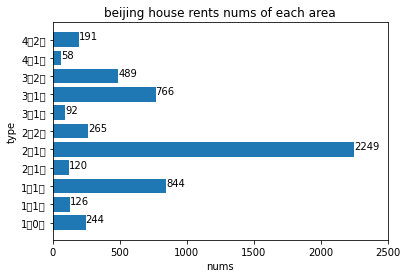

In [156]:
house_type=house_analyse["houseType"]
house_type_num=house_analyse["nums"]
plt.barh(range(11),house_type_num)
plt.yticks(range(11),house_type)
plt.xlim(0,2500)
plt.title("beijing house rents nums of each area")
plt.xlabel("nums")
plt.ylabel("type")

# add number deracator of each bar
for x,y in enumerate(house_type_num):
    plt.text(y,x,"%s"%y)

plt.show()

## average rent annalyse

In [ ]:
# 区域 	小区名称 	户型 	面积(㎡) 	价格(元/月)

In [157]:
df_all=pd.DataFrame({"area":file_data["区域"].unique(),
              "totalCost":[0]*file_data["区域"].unique().shape[0],
              "totalArea":[0]*13
             })
df_all

,area,totalCost,totalArea
0,东城,0,0
1,丰台,0,0
2,亦庄开发区,0,0
3,大兴,0,0
4,房山,0,0
5,昌平,0,0
6,朝阳,0,0
7,海淀,0,0
8,石景山,0,0
9,西城,0,0


In [161]:
sum_price=file_data["价格(元/月)"].groupby(file_data["区域"]).sum()
sum_area=file_data["面积(㎡)"].groupby(file_data["区域"]).sum()
#sum_area

In [162]:
df_all["totalCost"]=sum_price.values
df_all["totalArea"]=sum_area.values
df_all

,area,totalCost,totalArea
0,东城,3945550,27353.99
1,丰台,4404893,50922.79
2,亦庄开发区,1318400,15995.53
3,大兴,2286950,35884.15
4,房山,726750,15275.41
5,昌平,2521515,35972.92
6,朝阳,20281396,166921.72
7,海淀,7279350,57210.39
8,石景山,1156500,13956.67
9,西城,5636975,37141.64


## calculate single m^2 price of each area

In [164]:
df_all["single price"]=round(df_all["totalCost"]/df_all["totalArea"],2)
df_all

,area,totalCost,totalArea,single price
0,东城,3945550,27353.99,144.24
1,丰台,4404893,50922.79,86.50
2,亦庄开发区,1318400,15995.53,82.42
3,大兴,2286950,35884.15,63.73
4,房山,726750,15275.41,47.58
5,昌平,2521515,35972.92,70.09
6,朝阳,20281396,166921.72,121.50
7,海淀,7279350,57210.39,127.24
8,石景山,1156500,13956.67,82.86
9,西城,5636975,37141.64,151.77


In [169]:
df_merge=pd.merge(new_df,df_all)
df_merge

,area,number,totalCost,totalArea,single price
0,东城,282,3945550,27353.99,144.24
1,丰台,577,4404893,50922.79,86.50
2,亦庄开发区,147,1318400,15995.53,82.42
3,大兴,362,2286950,35884.15,63.73
4,房山,180,726750,15275.41,47.58
5,昌平,347,2521515,35972.92,70.09
6,朝阳,1597,20281396,166921.72,121.50
7,海淀,605,7279350,57210.39,127.24
8,石景山,175,1156500,13956.67,82.86
9,西城,442,5636975,37141.64,151.77


### show in picture

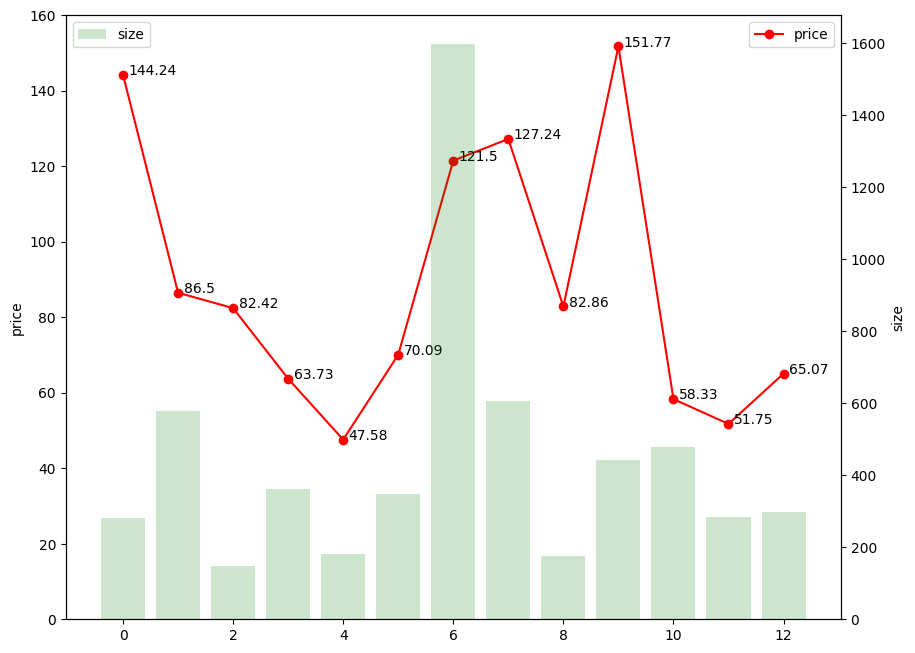

In [189]:
num=df_merge["number"]
price=df_merge["single price"]
lx=df_merge["area"]
l=[i for i in range(13)]
fig=plt.figure(figsize=(10,8),dpi=100)

#display liner picture
axl=fig.add_subplot(111)

axl.plot(l,price,"or-",label="price")
for i,(_x,_y)in enumerate(zip(l,price)):
    plt.text(_x+0.1,_y,price[i])
axl.set_ylim([0,160])
axl.set_ylabel("price")
plt.legend(loc="best")

#display bow line picture
ax2=axl.twinx()
plt.bar(l,num,label="size",alpha=0.2,color="green")
ax2.set_ylabel("size")
plt.legend(loc="upper left")
# plt.xticks(l,lx)
plt.show()

## basic area annalyse

In [ ]:
# 区域 	小区名称 	户型 	面积(㎡) 	价格(元/月)

In [192]:
print("max house area is %s"%file_data["面积(㎡)"].max())
print("min house area is %s"%file_data["面积(㎡)"].min())
print("max house price is %s"%file_data["价格(元/月)"].max())
print("min house price is %s"%file_data["价格(元/月)"].min())

max house area is 1133.0
min house area is 11.63
max house price is 150000
min house price is 566


In [194]:
area_divide=[1,30,50,70,90,120,140,160,1200]
area_cut=pd.cut(list(file_data["面积(㎡)"]),area_divide)

In [197]:
area_count_num=area_cut.describe()
area_count_num

,counts,freqs
categories,,
"(1, 30]",41,0.007102
"(30, 50]",710,0.122986
"(50, 70]",1566,0.271263
"(70, 90]",1094,0.189503
"(90, 120]",1082,0.187424
"(120, 140]",381,0.065997
"(140, 160]",274,0.047462
"(160, 1200]",625,0.108263


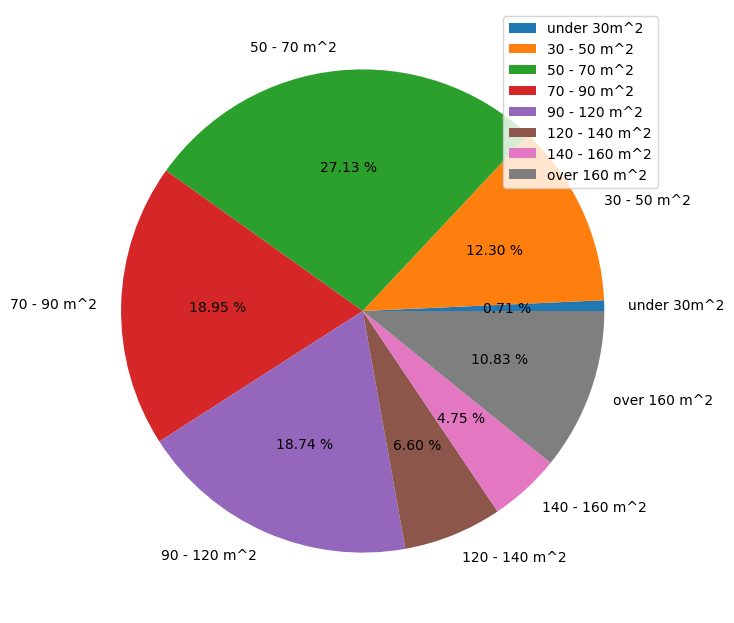

In [209]:
# data visualization
area_per=(area_count_num["freqs"].values)*100
# area_per
labels=["under 30m^2","30 - 50 m^2","50 - 70 m^2"
        ,"70 - 90 m^2","90 - 120 m^2","120 - 140 m^2","140 - 160 m^2","over 160 m^2"]
plt.figure(figsize=(20,8),dpi=100)
plt.axes()
plt.pie(x=area_per,labels=labels,autopct="%.2f %%")
plt.legend()
plt.show()
